## Cleaning the dataset with data preprocessing

Dataset analysis

---

In [12]:
import pandas as pd
import numpy as np

base_url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
df = pd.read_csv(base_url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df.shape

(8950, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


I checked the null values ​​and replaced them with the mean.

---

In [16]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [17]:
for col in df.columns:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)

df.head()

<ipython-input-17-b8bea50fbc65>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


I then transformed the **PRCFULLPAYMENT** column into a percentage

---


In [19]:
percentage = (df['PRC_FULL_PAYMENT'] * 100).round(2)
df['PRC_FULL_PAYMENT'] = percentage
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,22.22,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12


I transformed the frequency of purchases, using a function, where the values ​​represented indicate:
- 1: frequent;
- 0: less frequent;

---


In [20]:
def frequency(series):
  result = []
  for i in series:
    if i < 1:
      result.append(0)
    else:
      result.append(1)

  return result

df['BALANCE_FREQUENCY'] = frequency(df['BALANCE_FREQUENCY'])
df['PURCHASES_FREQUENCY'] = frequency(df['PURCHASES_FREQUENCY'])
df['ONEOFF_PURCHASES_FREQUENCY'] = frequency(df['ONEOFF_PURCHASES_FREQUENCY'])
df['PURCHASES_INSTALLMENTS_FREQUENCY'] = frequency(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
df['CASH_ADVANCE_FREQUENCY'] = frequency(df['CASH_ADVANCE_FREQUENCY'])

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0,95.40,0.00,95.4,0.000000,0,0,0,0,0,2,1000.0,201.802084,139.509787,0.00,12
1,C10002,3202.467416,0,0.00,0.00,0.0,6442.945483,0,0,0,0,4,0,7000.0,4103.032597,1072.340217,22.22,12
2,C10003,2495.148862,1,773.17,773.17,0.0,0.000000,1,1,0,0,0,12,7500.0,622.066742,627.284787,0.00,12
3,C10004,1666.670542,0,1499.00,1499.00,0.0,205.788017,0,0,0,0,1,1,7500.0,0.000000,864.206542,0.00,12
4,C10005,817.714335,1,16.00,16.00,0.0,0.000000,0,0,0,0,0,1,1200.0,678.334763,244.791237,0.00,12


I rounded to two digits after the decimal point

---



In [21]:
def round_values(df, columns):
  for col in columns:
    df[col] = df[col].round(2)

  return df

df = round_values(df, ['BALANCE', 'PAYMENTS', 'ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE'])
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0,95.40,0.00,95.4,0.00,0,0,0,0,0,2,1000.0,201.80,139.51,0.00,12
1,C10002,3202.47,0,0.00,0.00,0.0,6442.95,0,0,0,0,4,0,7000.0,4103.03,1072.34,22.22,12
2,C10003,2495.15,1,773.17,773.17,0.0,0.00,1,1,0,0,0,12,7500.0,622.07,627.28,0.00,12
3,C10004,1666.67,0,1499.00,1499.00,0.0,205.79,0,0,0,0,1,1,7500.0,0.00,864.21,0.00,12
4,C10005,817.71,1,16.00,16.00,0.0,0.00,0,0,0,0,0,1,1200.0,678.33,244.79,0.00,12


Normalization


---



In [22]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

x = df.drop(['CUST_ID'], axis=1)
x_norm = mms.fit_transform(x)

df = pd.DataFrame(x_norm, columns=x.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.0,0.001945,0.000000,0.00424,0.000000,0.0,0.0,0.0,0.0,0.00000,0.005587,0.031720,0.003979,0.001826,0.0000,1.0
1,0.168169,0.0,0.000000,0.000000,0.00000,0.136685,0.0,0.0,0.0,0.0,0.03252,0.000000,0.232053,0.080893,0.014034,0.2222,1.0
2,0.131026,1.0,0.015766,0.018968,0.00000,0.000000,1.0,1.0,0.0,0.0,0.00000,0.033520,0.248748,0.012264,0.008210,0.0000,1.0
3,0.087521,0.0,0.030567,0.036775,0.00000,0.004366,0.0,0.0,0.0,0.0,0.00813,0.002793,0.248748,0.000000,0.011310,0.0000,1.0
4,0.042940,1.0,0.000326,0.000393,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.002793,0.038397,0.013374,0.003204,0.0000,1.0


## Correlation matrix

I build a correlation matrix to more accurately select the variables


---



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

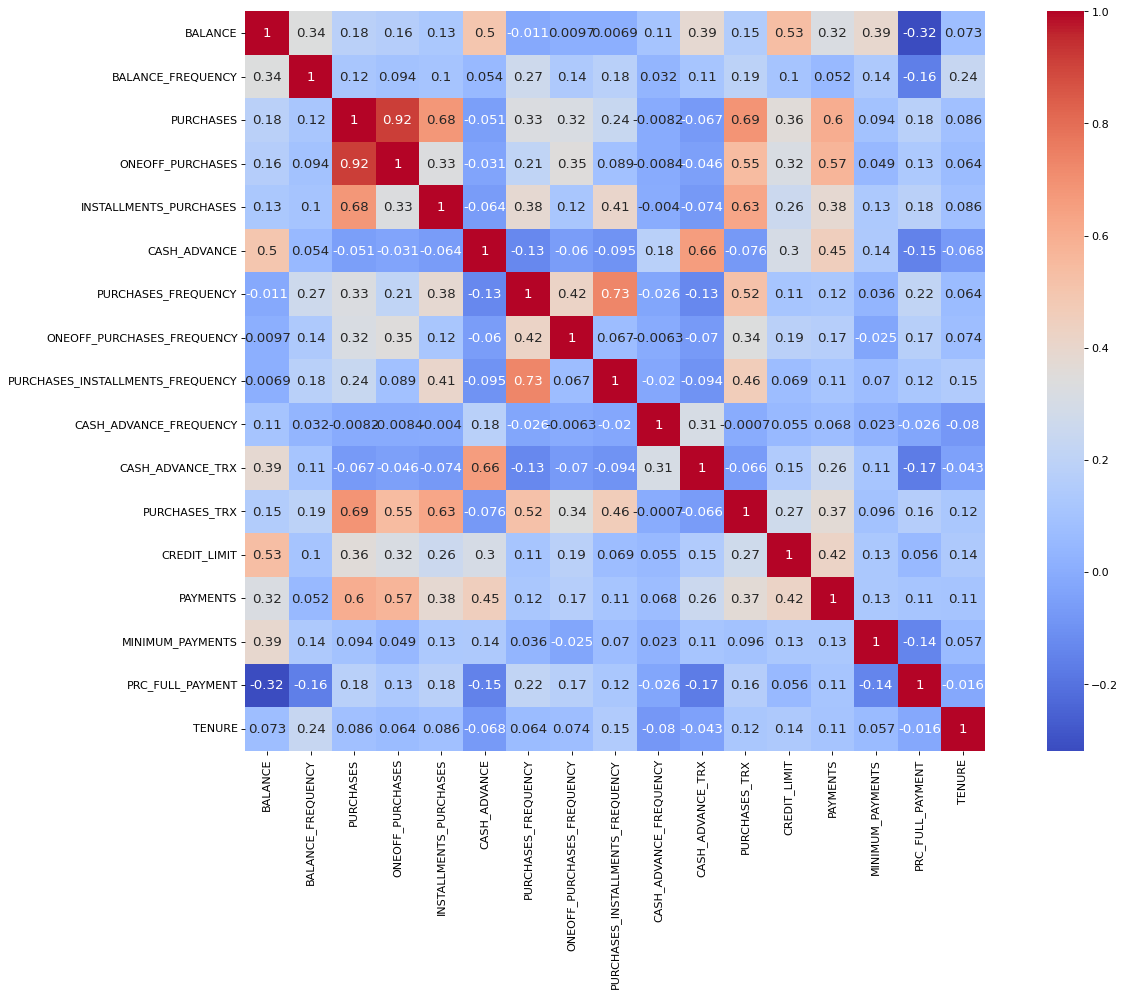

In [24]:
plt.figure(figsize=(20, 12), dpi=80)

corr = df.corr()

hm = sns.heatmap(corr,
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={'size':12},
                 cmap= 'coolwarm')
plt.show()

## Clustering

### Customer Profiling Based on Spending and Payment Habits

---



I mainly focus on these variables:
- **BALANCE** : Amount of balance left on the account to make purchases;
- **PURCHASES** : Amount of purchases made from the account;
-**CASH_ADVANCE** : Cash advance given by the user;
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by the user;

and I perform the normalization, then later the clustering will be applied only on the scaled data.

---


In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = df[['BALANCE','PURCHASES', 'CASH_ADVANCE', 'MINIMUM_PAYMENTS']]


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

k = 5

kmeans = KMeans(n_clusters=k, init="k-means++")
cluster = kmeans.fit_predict(data_scaled)

In [26]:
print(data)

       BALANCE  PURCHASES  CASH_ADVANCE  MINIMUM_PAYMENTS
0     0.002148   0.001945      0.000000          0.001826
1     0.168169   0.000000      0.136685          0.014034
2     0.131026   0.015766      0.000000          0.008210
3     0.087521   0.030567      0.004366          0.011310
4     0.042940   0.000326      0.000000          0.003204
...        ...        ...           ...               ...
8945  0.001496   0.005936      0.000000          0.000640
8946  0.001007   0.006118      0.000000          0.011310
8947  0.001229   0.002945      0.000000          0.001078
8948  0.000707   0.000000      0.000776          0.000730
8949  0.019572   0.022293      0.002695          0.001155

[8950 rows x 4 columns]


In [27]:
RANDOM_STATE = 0

I created a function that applies the Elbow Method on the dataset to display the sum of the distances within the clusters versus the number of clusters

---

In [28]:
x = data[['BALANCE','PURCHASES']].values

In [29]:
def elbow_method(x, max_cluster):

  # I used max_cluster to make the number of clusters to test dynamic, without fixing it to 10.

  sse = []

  for k in range(1, max_cluster + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

  plt.figure(figsize=(12, 8))
  plt.plot(range(1, max_cluster + 1), sse, marker='o', color='b')

  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        }

  plt.xlabel("Number of Clusters", fontsize=14, fontdict=font)
  plt.ylabel("Sum of Squared Distances", fontsize=14, fontdict=font)
  plt.title("The Elbow Method", fontsize=16, fontdict=font)

  plt.grid(True)
  plt.show()

The optimal number of clusters according to the Elbow Method is probably **2 or 3**. This means that dividing the data into 2 or 3 clusters maximizes the efficiency while reducing the SSD **without complicating the model**

---


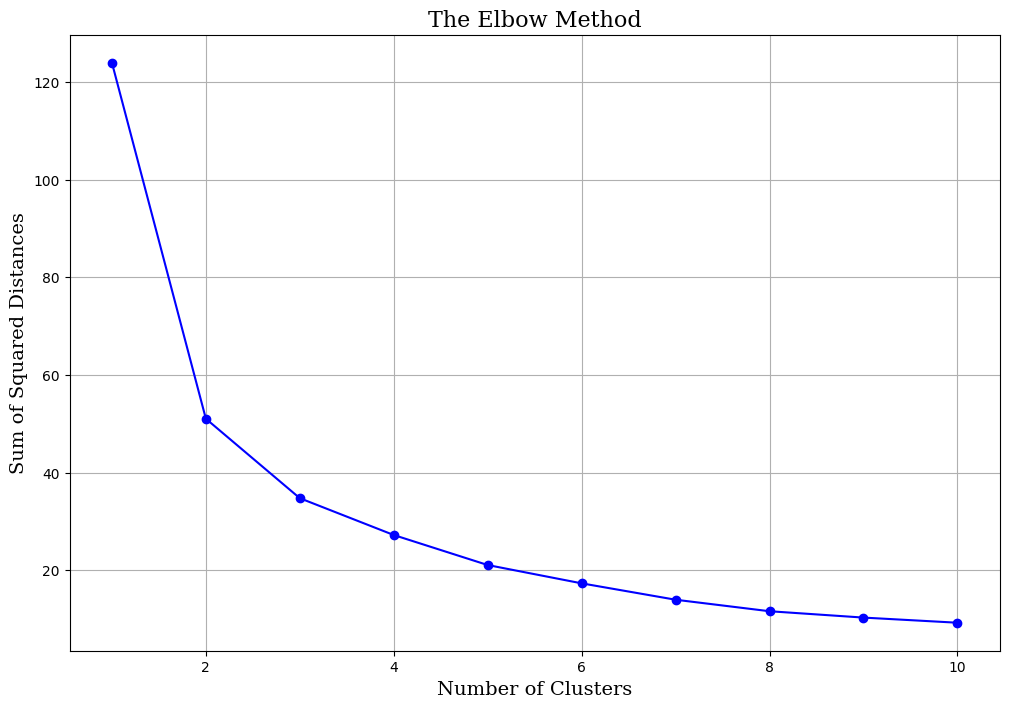

In [30]:
elbow_method(x, 10)

With this function I created a scatterplot to visualize the generated clusters. The colored dots are according to the clusters, the red dots are the cluster centers, and if requested it shows the SSD value between the dots and the centers

---

In [31]:
def clusters(model, data, axlabels=None, print_ssd=False):

    y_pred = model.predict(data)
    fig, ax = plt.subplots(figsize=(12, 8))

    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100, palette='viridis', ax=ax)

    ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
               c='red', s=200, alpha=0.5, marker='o', label='Centroids')

    if axlabels:
        ax.set_xlabel(axlabels[0], fontsize=16)
        ax.set_ylabel(axlabels[1], fontsize=16)

    if print_ssd:
      x_text = data[:, 0].max() - (data[:, 0].max() - data[:, 0].min()) * 0.1
      y_text = data[:, 1].min() + (data[:, 1].max() - data[:, 1].min()) * 0.1
      ax.text(x_text, y_text, f"SSD = {model.inertia_:.2f}", fontsize=14, color='black')

    ax.legend()
    plt.tight_layout()
    plt.show()

Model creation and training. Finally, cluster visualization

---


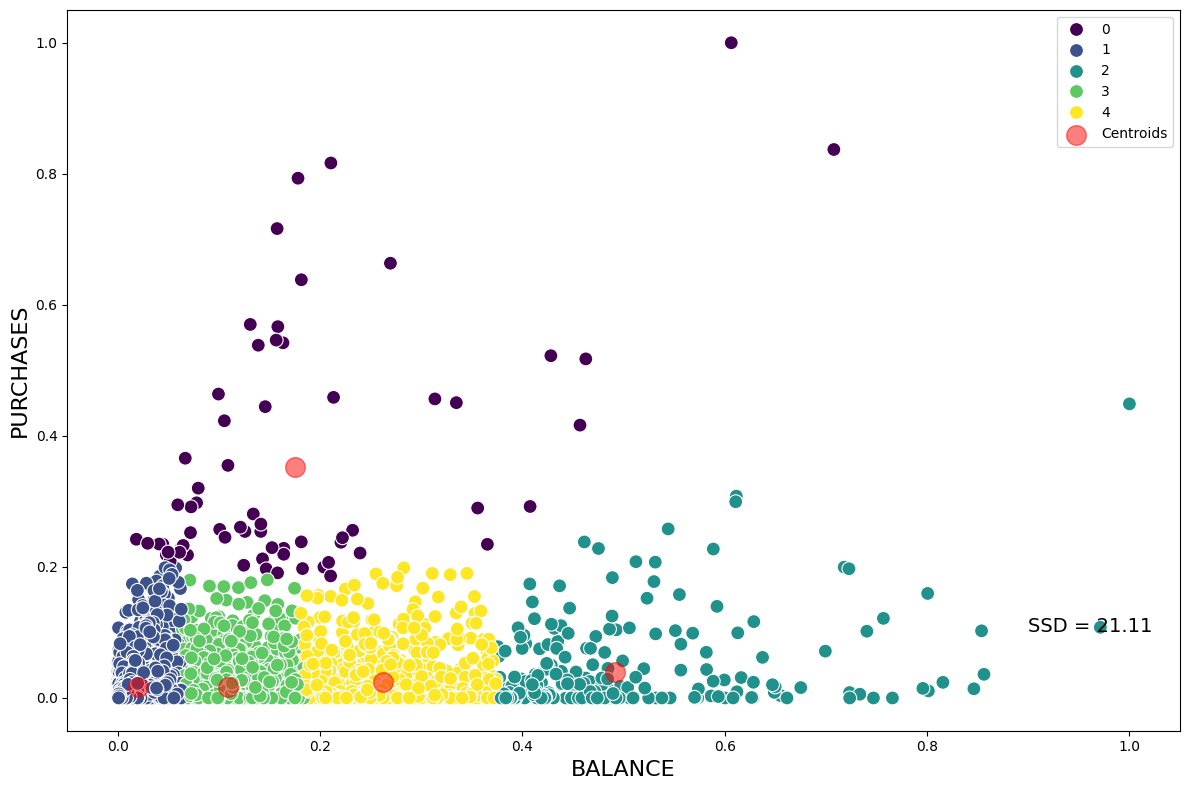

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_STATE).fit(x)
clusters(kmeans, x, axlabels=["BALANCE","PURCHASES"], print_ssd=True)

The graph shown has divided the customers into five clusters, based on two characteristics:

- **BALANCE** : amount of balance left on the account to make purchases;
- **PURCHASES** : Quantity of purchases made from the account;

The analysis shows that credit card customers are not all the same and can be divided into distinct groups based on their spending behavior and how they manage their debt. The red dots are the 'centers' of each group, showing the average position of all the dots in that group.

Each group has a characteristic profile:

- Cluster 0: customers with little balance left on the account and few purchases.
- Cluster 1: customers with a good balance between balance and purchases.
- Cluster 2: similar to the previous group, but they make even fewer purchases.
- Cluster 3: customers with little debt and many purchases.
- Cluster 4: customers with very little debt and very many purchases
---


In [33]:
x = data[['BALANCE','CASH_ADVANCE']].values

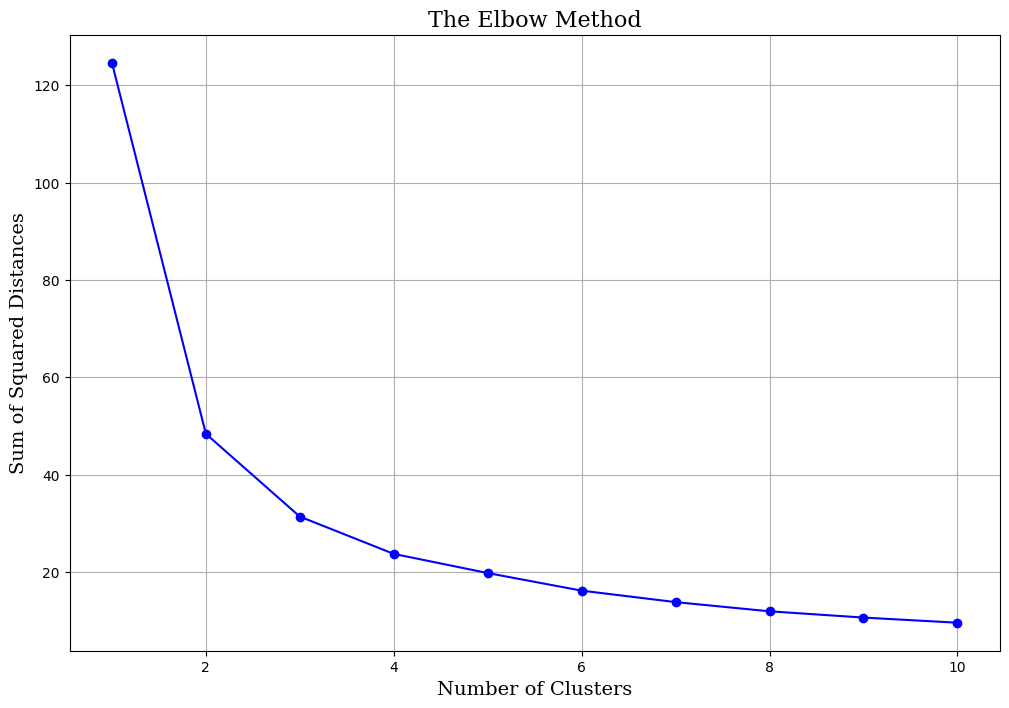

In [34]:
elbow_method(x, 10)

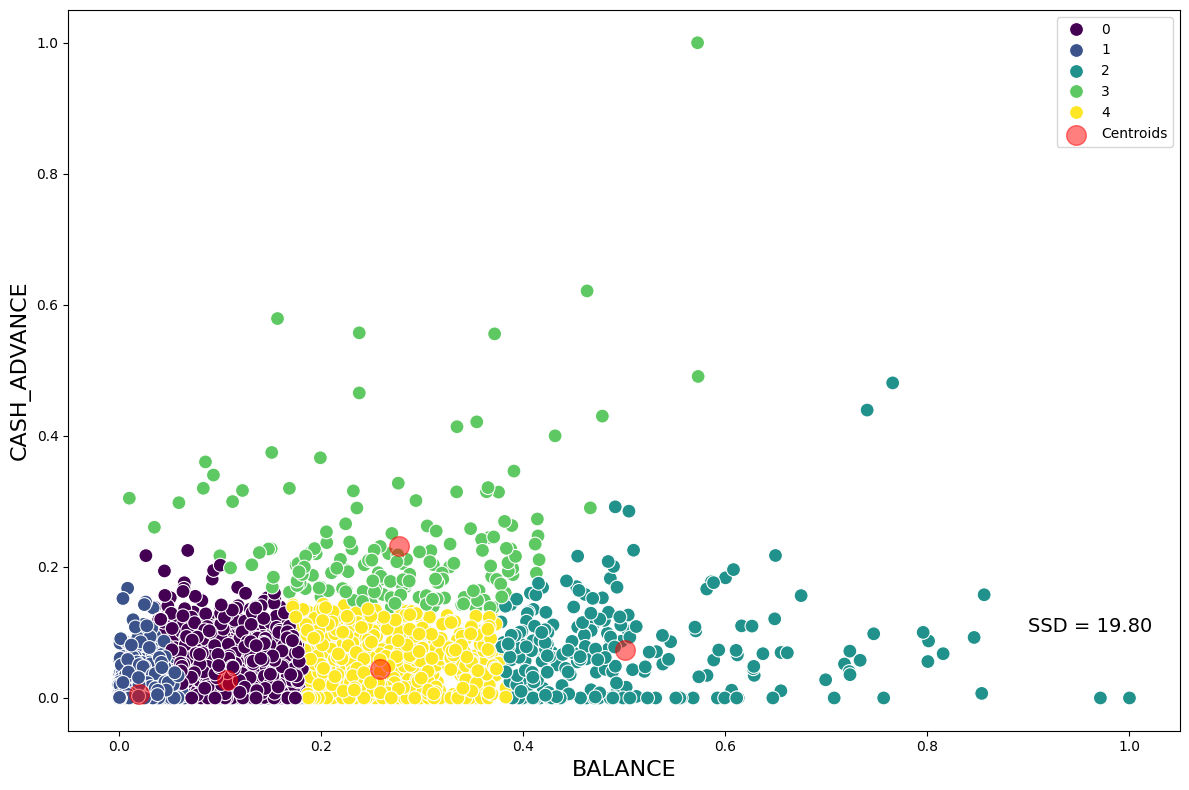

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_STATE).fit(x)
clusters(kmeans, x, axlabels=["BALANCE","CASH_ADVANCE"], print_ssd=True)

The graph represented has divided the customers into five clusters, based on two characteristics:

- **BALANCE** : amount of balance left in the account to make purchases;
- **CASH_ADVANCE** : Cash advance given by the user;

The analysis shows:
- Cluster 0: Represents customers with high balances and a moderate use of cash advances.
- Cluster 1: Represents customers with a good balance between balance and cash advances.
- Cluster 2: similar to the previous one, but with a slightly lower volume of cash advances.
- Cluster 3: Represents customers with a low residual debt and a moderate propensity to purchase.
- Cluster 4: Represents customers with very low balances and a very high volume of cash advance.

The SSD is made up of a low value (19.80) indicating that the points within each cluster are relatively close to each other.


---



In [36]:
x = data[['PURCHASES','MINIMUM_PAYMENTS']].values

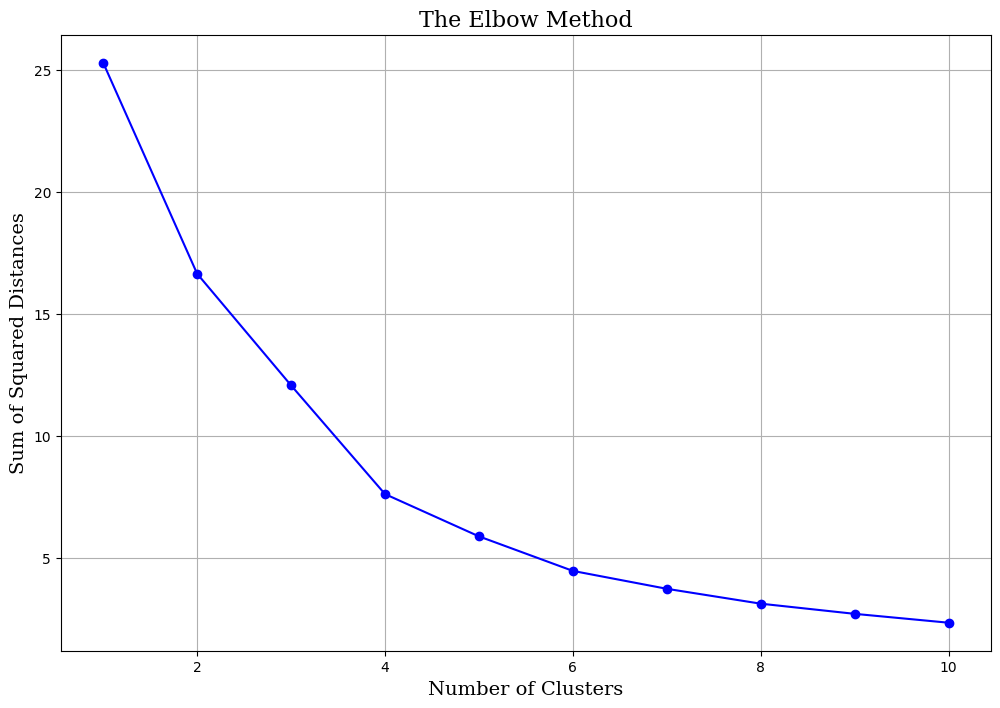

In [37]:
elbow_method(x, 10)

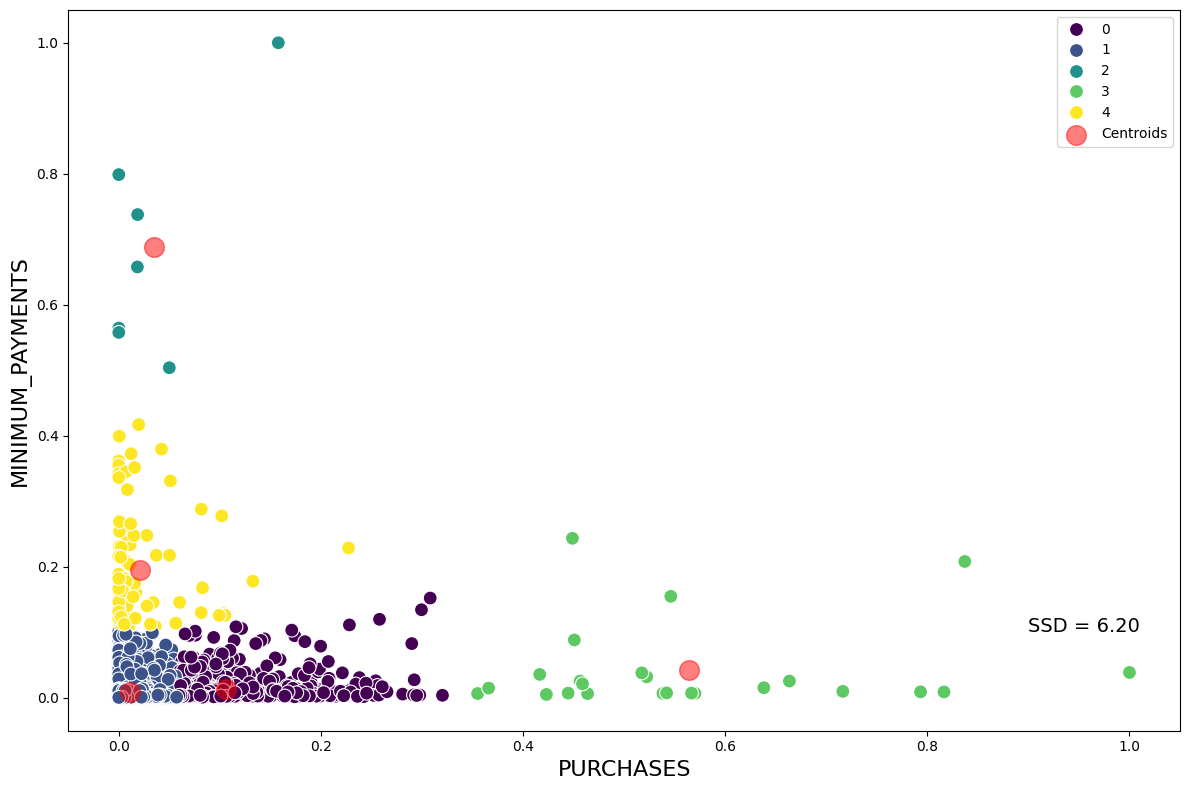

In [38]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_STATE).fit(x)
clusters(kmeans, x, axlabels=['PURCHASES','MINIMUM_PAYMENTS'], print_ssd=True)

The graph represented divided the customers into five clusters, based on two characteristics:

- **PURCHASES** : Quantity of purchases made from the account;
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by the user;

The analysis revealed that:
- Cluster 0: Low volume of purchases and low minimum payments.
- Cluster 1: Moderate volume of purchases and low minimum payments.
- Cluster 2: High volume of purchases and high minimum payments.
- Cluster 3: Moderate volume of purchases and moderate minimum payments.
- Cluster 4: Low volume of purchases and moderate minimum payments.

The SSD value of 5.88 confirms that the clusters are well separated and homogeneous.


---




In [39]:
x = df[['BALANCE','PURCHASES','MINIMUM_PAYMENTS']].values

In [40]:
from mpl_toolkits import mplot3d

def plot_clusters3d(model, data, axlabels=None):
  y_pred = model.predict(data)

  ax = plt.axes(projection ="3d")
  ax.scatter3D(data[:,0], data[:,1], data[:,2], edgecolors= "black", c=y_pred)
  ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color="red", s=100)

Inertia: 32.319642074361575


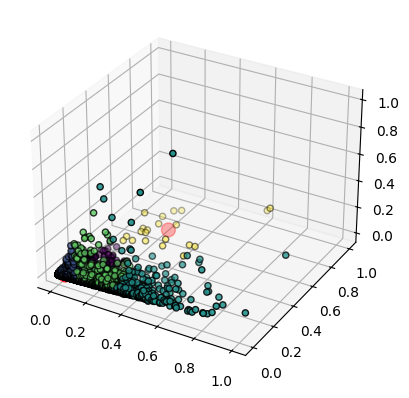

In [41]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = RANDOM_STATE)
kmeans.fit(x)
print(f'Inertia: {kmeans.inertia_}')
plot_clusters3d(kmeans, x, axlabels=["BALANCE","PURCHASES"])

The position of a point in 3D space is determined by the values ​​of three variables: **BALANCE**, **PURCHASES**, and **MINIMUM_PAYMENTS**. For example, customers with high balances, many purchases, and high minimum payments will be positioned in a different area than customers with low balances, few purchases, and low minimum payments.


---

